# Oefentoets Computational Modelling
Deze oefentoets bestaat uit twee opdrachten met verschillende opgaven per opdracht. In de eerste opdracht gaan jullie aan de slag met het verkennen van een dataset en in de tweede opdracht met unsupervised learning. Voor deze oefentoets hebben jullie 60 minuten de tijd.

Lees de instructies hieronder goed door.

### Beantwoorden vragen
Licht jouw uitwerking toe. Documenteer belangrijke stukken code en licht jouw werkwijze toe. 

#### Code documenteren
Simpele code zoals het aanmaken van een leeg array of een train_test_split functie aanroepen hoeft niet toegelicht te worden, maar wanneer je iets doet dat belangrijk is om te begrijpen omdat het essentieel is voor de opdracht moet toegelicht worden. Leg dit uit m.b.v. commentaar bij de code.

#### Werkwijze toelichten
Om tot een oplossing te komen, voer je vaak meerdere stappen uit. Leg uit welke stappen je uitvoert, waarom deze stappen nodig zijn, de volgorde, etc. Gebruik hier voor een aparte 'Markdown' cel.

#### Gebruik van online bronnen
Je mag de documentatie van numpy, pandas, sklearn, etc. raadplegen. Je mag ook gebruik maken van websites als stackoverflow.com maar je mag geen code kopiëren van die sites.

Je mag ook gebruik maken van Copilot, ChatGPT of andere AI-tools maar je mag die code ook niet zomaar kopiëren: gebruik de resultaten van de prompts puur als inspiratie. Daarnaast moet je de prompts als bronvermelding noemen.

Je mag Copilot, ChatGPT of andere AI-tools **niet** gebruiken voor het documenteren, toelichten van de werkwijze of voor het beantwoorden van open vragen.

Bij het vermoeden van onrechtmatig gebruik van bronnen zal een individueel assessment volgen.

## Opdracht 1
In deze opdracht gaan jullie een dataset verkennen. We gebruiken hiervoor de IMDB movieset.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [60]:
df = pd.read_csv('movie.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Opgave 1.1.**

Bepaal of de kolommen `['duration','gross','budget','imdb_score']` outliers bevatten. Zo ja, zijn het zwakke of sterke outliers?

In [61]:
for col in ['duration', 'gross', 'budget', 'imdb_score']:
    kolom = df[col]
    Q1 = kolom.quantile(0.25)
    Q3 = kolom.quantile(0.75)
    IQR = Q3 - Q1
    uitschieters = df[(kolom < Q1 - 1.5*IQR) | (kolom > Q3 + 1.5*IQR)]
    sterke_uitschieters = uitschieters[(uitschieters[col] < Q1 - 3*IQR) | (uitschieters[col] > Q3 + 3*IQR)]
    print('Voor feature {} zijn er {} uitschieters, hiervan zijn er {} sterk en {} zwak'.format(col, len(uitschieters), len(sterke_uitschieters), len(uitschieters) - len(sterke_uitschieters)))

Voor feature duration zijn er 241 uitschieters, hiervan zijn er 49 sterk en 192 zwak
Voor feature gross zijn er 306 uitschieters, hiervan zijn er 119 sterk en 187 zwak
Voor feature budget zijn er 318 uitschieters, hiervan zijn er 118 sterk en 200 zwak
Voor feature imdb_score zijn er 120 uitschieters, hiervan zijn er 0 sterk en 120 zwak


**Opgave 1.2**

Bepaal het gemiddelde en de mediaan van `gross`. Verklaar hoe het mogelijk is dat er een verschil is tussen deze twee waarden.

**Merk op:** voor het open deel van deze vraag mag je geen gebruik maken van Copilot, ChatGPT of andere AI-tools.

In [62]:
mediaan = df['gross'].quantile(.5)

In [63]:
gemiddelde = df['gross'].mean()

In [64]:
gemiddelde - mediaan

22950907.526809327

Het gemiddelde is groter dan de mediaan, dit wijst erop dat de data scheef verdeeld is. Er zijn een aantal films met een hoog budget die het gemiddelde omhoog trekken.

**Opgave 1.3.**

Bepaal de correlatie tussen de kolommen `['duration','gross','budget', 'imdb_score']` onderling. Stel je gaat een model trainen met `imdb_score` als target variabele. Welke conclusies kun je dan trekken op basis van deze analyse.

In [65]:
df[['duration', 'gross','budget','imdb_score']].corr()

,duration,gross,budget,imdb_score
duration,1.000000,0.250298,0.074276,0.261662
gross,0.250298,1.000000,0.102179,0.198021
budget,0.074276,0.102179,1.000000,0.030688
imdb_score,0.261662,0.198021,0.030688,1.000000


Conclusie: Er is geen hoge correlatie tussen de features en de targetvariabele. Gross en duration zullen enige voorspellende waarde hebben, maar budget bijna geen. Er is geen sterkte correlatie tussen de onafhankelijke variabelen, dus op basis daarvan hoeven geen features verwijderd te worden.

De hoogste correlatie is tussen de imdb score en de duration, dus dat zegt dat langere films vaak een wat hogere imdb score hebben

**Opgave 1.4.**

Toon de volgende gegevens:

1. Een overzicht van de gemiddelde IMDB scores per regisseur (`director_name`), aflopend gesorteerd
2. Een overzicht van de drie films met de langste duur
3. Een overzicht van de duur en IMDB score van alle Franstalige films (`language = 'French'`) uit 2014 en 2015
4. Uitbreiding op vraag 3: toon de gemiddelde duur en IMDB score van deze films

In [66]:
df[['director_name','imdb_score']].groupby('director_name').agg('mean').reset_index().sort_values('imdb_score', ascending = False)

,director_name,imdb_score
1084,John Blanchard,9.5
1620,Mitchell Altieri,8.7
2011,Sadyk Sher-Niyaz,8.7
299,Cary Bell,8.7
1606,Mike Mayhall,8.6
...,...,...
773,Georgia Hilton,2.2
2326,Vondie Curtis-Hall,2.1
723,Frédéric Auburtin,2.0
0,A. Raven Cruz,1.9


In [67]:
df.sort_values('duration', ascending = False)[['movie_title', 'duration']].head(3)

,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0


In [68]:
df[(df['language']=='French') & ((df['title_year']==2014) | (df['title_year']==2015))]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
489,Color,Lucile Hadzihalilovic,63.0,81.0,92.0,8.0,Roxane Duran,23.0,NaN,Drama|Horror|Mystery|Sci-Fi,...,3.0,French,France,NaN,NaN,2015.0,21.0,6.4,2.35,257
1178,Color,Jamel Debbouze,9.0,101.0,326.0,6.0,Youssef Hajdi,326.0,NaN,Adventure|Animation|Comedy|Family,...,5.0,French,France,NaN,NaN,2015.0,152.0,4.9,NaN,161
3088,Color,Eric Lartigau,94.0,106.0,7.0,24.0,Eric Elmosnino,68.0,NaN,Comedy|Drama|Music,...,27.0,French,France,NaN,11000000.0,2014.0,29.0,7.4,1.85,0
3313,Color,Eric Lavaine,17.0,98.0,0.0,5.0,Julie Engelbrecht,186.0,NaN,Comedy,...,1.0,French,France,NaN,NaN,2014.0,41.0,6.1,2.35,348
3437,Color,David Oelhoffen,102.0,101.0,2.0,40.0,Reda Kateb,10000.0,NaN,Drama|War|Western,...,19.0,French,France,NaN,7700000.0,2014.0,154.0,7.3,2.35,2000
4455,Color,Mathieu Amalric,92.0,76.0,412.0,3.0,Léa Drucker,412.0,231186.0,Crime|Romance|Thriller,...,16.0,French,France,R,NaN,2014.0,4.0,6.3,1.33,389
4714,Color,Johanna Schwartz,22.0,105.0,0.0,0.0,Garba Touré,0.0,NaN,Documentary,...,2.0,French,UK,NaN,400000.0,2015.0,0.0,7.7,NaN,34


In [69]:
df[(df['language']=='French') & ((df['title_year']==2014) | (df['title_year']==2015))]['duration'].mean()

95.42857142857143

In [70]:
df[(df['language']=='French') & ((df['title_year']==2014) | (df['title_year']==2015))]['imdb_score'].mean()

6.585714285714286

## Opdracht 2
In deze opdracht gaan jullie een model trainen met behulp van unsupervised learning.

In [71]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [72]:
#X is een random gemaakt numpy array met twee features
X, _ = make_blobs(n_samples=400, centers=7,
                       cluster_std=0.90, random_state=0)

**Opgave 2.1**

Maak een visualisatie die de relatie tussen de twee features in X weergeeft. Zijn er relaties of verbanden te zien?

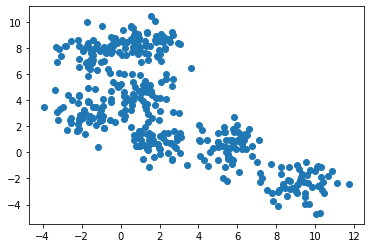

In [73]:
plt.scatter(X[:,0], X[:,1])

Er lijken een paar clusters in de data te zitten. Op het oog is niet te zeggen hoeveel dit er zijn.

Ook is er een negatieve correlatie te zien, maar omdat we gaan clusteren is die observatie minder relevant.

**Opgave 2.2.**

Gebruik `KMeans` om een clustering te maken van de punten in array `X`. Kies voor `k` = 5.

In [74]:
model = KMeans(n_clusters = 5)
model.fit(X)

KMeans(n_clusters=5)

**Opgave 2.3.**

Bepaal de score van gevonden clustering.

In [75]:
model.score(X)

-1081.222314259273

**Opgave 2.4.**

Pas de scatterplot van opgave 2.1 aan en visualiseer de gevonden clusters.

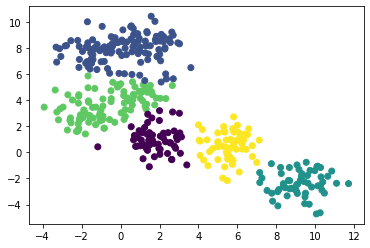

In [76]:
plt.scatter(X[:,0], X[:,1], c = model.predict(X))

**Opgave 2.5.**

Maak een clustering voor `k` = 1 t/m 20. Geef aan voor welke `k` de clustering het _beste_ is. Onderbouw wat je onder het _beste_ verstaat.

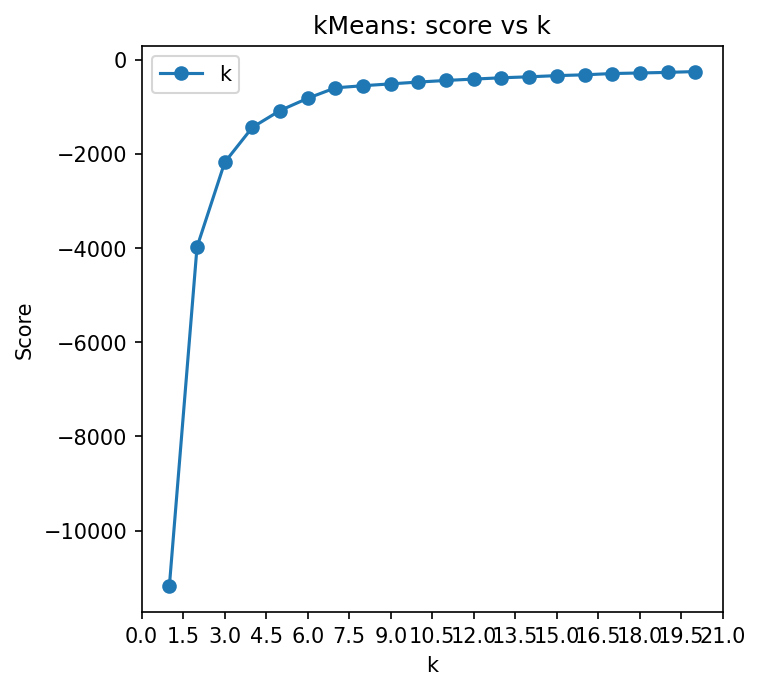

In [77]:
data = []
for i in range(1, 21):
    model_kMeans = KMeans(n_clusters=i, random_state=0)
    prediction_kMeans = model_kMeans.fit_predict(X)
    data.append([i, model_kMeans.score(X)])

df = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

# object axes: de grafiekbasis
ax = plt.axes()

ax.set(xlim=(0,21),
       xlabel='k',
       ylabel='Score',
       title='kMeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(np.array(df['k']), np.array(df['Score']), '-o')

ax.legend(['k'])

**Opgave 2.6.**

Maak ook een clustering met `GaussianMixture` met de in opgave 2.5 gekozen `k`. 

In [78]:
gmm = GaussianMixture(n_components=3, random_state = 0)
gmm.fit(X)
pred_gmm = gmm.predict(X)

**Opgave 2.7.**

Hoeveel punten uit X worden door `KMeans` en `GaussianMixture` in verschillende clusters ingedeeld. 

In [79]:
kmeans = KMeans(n_clusters=3, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [80]:
pred_kmeans = kmeans.predict(X)

In [81]:
sum(~(pred_kmeans == pred_gmm))

21

Op 22 punten verschilt de voorspelling van KMeans van die van GaussianMixtureModels.

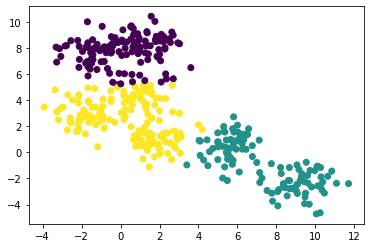

In [82]:
plt.scatter(X[:,0], X[:,1], c = pred_kmeans)

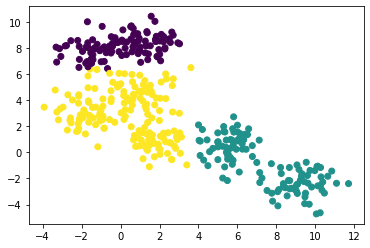

In [83]:
plt.scatter(X[:,0], X[:,1], c = pred_gmm)

## Einde toets
Voer `Restart & Run All` uit onder `Kernel` en check of er geen errors zijn.